Esta simulación consta de los siguientes pasos:
- Crear una fuente de luz polarizada linealmente a 0º y otra a 90º
- Posteriormente pasan por un retardador
- Y finalmente por un polarizador lineal a 45º
- Tras esto ambos rayos tendrán la misma polarización por lo que podremos ver la interferencia cuando estos rayos interactuan

In [1]:
#Cargamos los módulos
import numpy as np
import matplotlib.pyplot as plt 
import random
from py_pol.jones_matrix import Jones_matrix, degrees
from py_pol.jones_vector import Jones_vector
from scipy.fft import fft

/media/luismiguel/mas_datos/bitbucket/py_pol/py_pol/jones_vector.py:1173: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if global_phase is not 0:


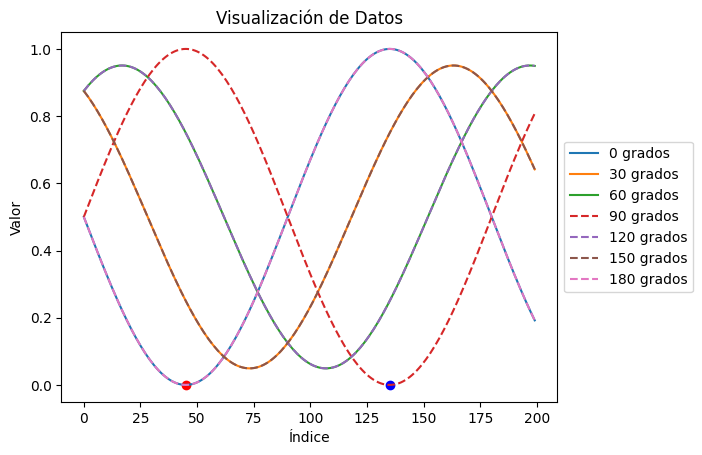

In [2]:

# Crear matrices de coordenadas para ANGLES y GIRO utilizando meshgrid
angles = np.linspace(360 * degrees, 0, 361)
Az = np.linspace(0,180*degrees,181)
AZ, ANGLES  = np.meshgrid(Az, angles)  

# Rayo a 0
P0 = 0 * degrees
E0 = Jones_vector()
E0.linear_light(azimuth=P0, intensity=1, global_phase=ANGLES)

# Rayo a 90
P90 = 90 * degrees
E90 = Jones_vector()
E90.linear_light(azimuth=P90, intensity=1, global_phase=-ANGLES)

# Polarizador a 45
P45 = 45 * degrees
JP45 = Jones_matrix("Polarizador lineal 45 grados")
JP45.diattenuator_perfect(azimuth=P45)

# Retardador
R = np.random.random() * 360 * degrees
R=90*degrees
# Calcular Jones matrices y realizar cálculos sin bucle explícito
JR = Jones_matrix("Diattenuator retarder")
JR.diattenuator_retarder_linear(R=R, p1=1, p2=1, azimuth=AZ)

# Calcular campos finales y total
Efinal_1 = JP45 * JR * E0
Efinal_2 = JP45 * JR * E90
Etotal = Efinal_1 + Efinal_2

I=Etotal.parameters.intensity()
I_norm = I / np.max(I)
I_norm_1_periodo=I_norm[:200,:]

minimos=np.zeros([7])
filas=np.zeros([7])
columnas=np.zeros([7])
I_plot=np.zeros([200,7])
# Plotear los resultados
for i in range(7):
    if i < 3:
        linestyle = '-' 
        plt.plot(I_norm_1_periodo[:,i*30], label=f'{30*i} grados', linestyle=linestyle)
    else:
        linestyle = '--'
        plt.plot(I_norm_1_periodo[:,i*30], label=f'{30*i} grados', linestyle=linestyle)
        
    I_plot[:,i]=I_norm_1_periodo[:,i*30]
    filas[i]=np.argmin(I_plot[:,i])
    columnas[i]=i
    
primer_minimo=np.argmin(filas)
ultimo_minimo=np.argmax(filas)
plt.scatter(filas[primer_minimo],I_plot[int(filas[primer_minimo]),int(columnas[primer_minimo])], color='red', marker='o')
plt.scatter(filas[ultimo_minimo],I_plot[int(filas[ultimo_minimo]), int(columnas[ultimo_minimo])], color='blue', marker='o')
# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Visualización de Datos')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

Aqui no hay que dividir entre 2 porque al poner el biprisma el periodo se me reduce a la mitad y por tanto el desplazamiento es la mitad (quedando así 2*retardandcia/2=retardancia)

In [3]:
print('Retardancia real = ', R/degrees)

Retardancia real =  90.0


In [4]:
retardancia=(filas[ultimo_minimo]-filas[primer_minimo])
retardancia

In [5]:
azimuth=columnas[primer_minimo]
azimuth

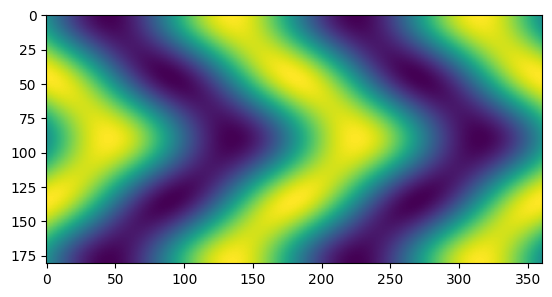

In [6]:
plt.imshow(I.T)

In [7]:
## Repetimos la experiencia con errores

El polarizador de 0 está a:  0.6255316950730957
El polarizador de 90 está a:  89.38565944462098
El polarizador de 45 está a:  44.344526267986275


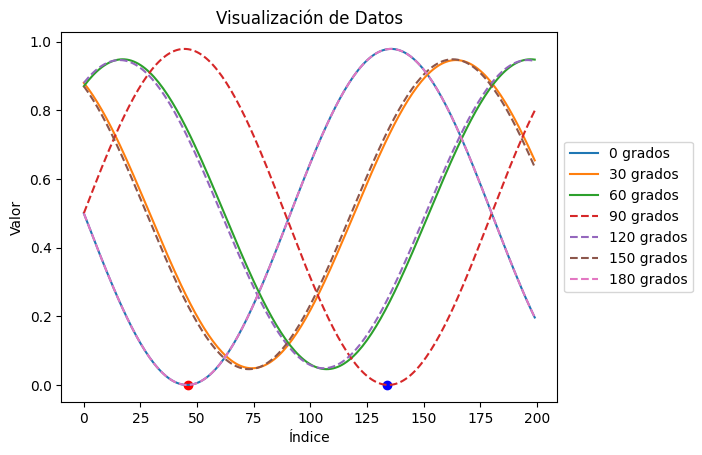

In [8]:

# Crear matrices de coordenadas para ANGLES y GIRO utilizando meshgrid
angles = np.linspace(360 * degrees, 0, 361)
Az = np.linspace(0,180*degrees,181)
AZ, ANGLES  = np.meshgrid(Az, angles)  

# Rayo a 0
P0 = random.gauss(0,0.5) * degrees
E0 = Jones_vector()
E0.linear_light(azimuth=P0, intensity=1, global_phase=ANGLES)
print("El polarizador de 0 está a: ",P0/degrees)
# Rayo a 90
P90 = random.gauss(90,0.5) * degrees
E90 = Jones_vector()
E90.linear_light(azimuth=P90, intensity=1, global_phase=-ANGLES)
print("El polarizador de 90 está a: ",P90/degrees)
# Polarizador a 45
P45 = random.gauss(45,0.5) * degrees
JP45 = Jones_matrix("Polarizador lineal 45 grados")
JP45.diattenuator_perfect(azimuth=P45)
print("El polarizador de 45 está a: ",P45/degrees)
# Retardador
#Cogemos la retardancia del caso ideal
# Calcular Jones matrices y realizar cálculos sin bucle explícito
JR = Jones_matrix("Diattenuator retarder")
JR.diattenuator_retarder_linear(R=R, p1=1, p2=1, azimuth=AZ)

# Calcular campos finales y total
Efinal_1 = JP45 * JR * E0
Efinal_2 = JP45 * JR * E90
Etotal = Efinal_1 + Efinal_2

I=Etotal.parameters.intensity()
I_norm = I / np.max(I)
I_norm_1_periodo=I_norm[:200,:]

minimos=np.zeros([7])
filas=np.zeros([7])
columnas=np.zeros([7])
I_plot=np.zeros([200,7])
# Plotear los resultados
for i in range(7):
    if i < 3:
        linestyle = '-' 
        plt.plot(I_norm_1_periodo[:,i*30], label=f'{30*i} grados', linestyle=linestyle)
    else:
        linestyle = '--'
        plt.plot(I_norm_1_periodo[:,i*30], label=f'{30*i} grados', linestyle=linestyle)
        
    I_plot[:,i]=I_norm_1_periodo[:,i*30]
    filas[i]=np.argmin(I_plot[:,i])
    columnas[i]=i
    
primer_minimo=np.argmin(filas)
ultimo_minimo=np.argmax(filas)
plt.scatter(filas[primer_minimo],I_plot[int(filas[primer_minimo]),int(columnas[primer_minimo])], color='red', marker='o')
plt.scatter(filas[ultimo_minimo],I_plot[int(filas[ultimo_minimo]), int(columnas[ultimo_minimo])], color='blue', marker='o')
# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Visualización de Datos')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
print('Retardancia real = ', R/degrees)

Retardancia real =  90.0


In [10]:
retardancia=(filas[ultimo_minimo]-filas[primer_minimo])
retardancia

In [11]:
azimuth=columnas[primer_minimo]
azimuth

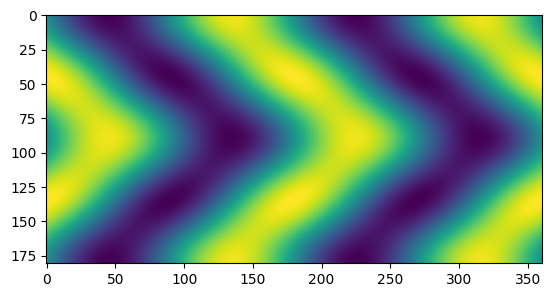

In [12]:
plt.imshow(I.T)